# Quantile Loss

Quantile Loss(分位数损失)是一个用于回归问题的带参损失，实际上分位数回归就是平均绝对误差的一种拓展。

分位数值γ的选择在于我们对正误差和反误差的重视程度。


Quantile Loss定义如下：
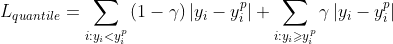

* 横坐标是真实值和预测值的误差，纵坐标是分位数损失

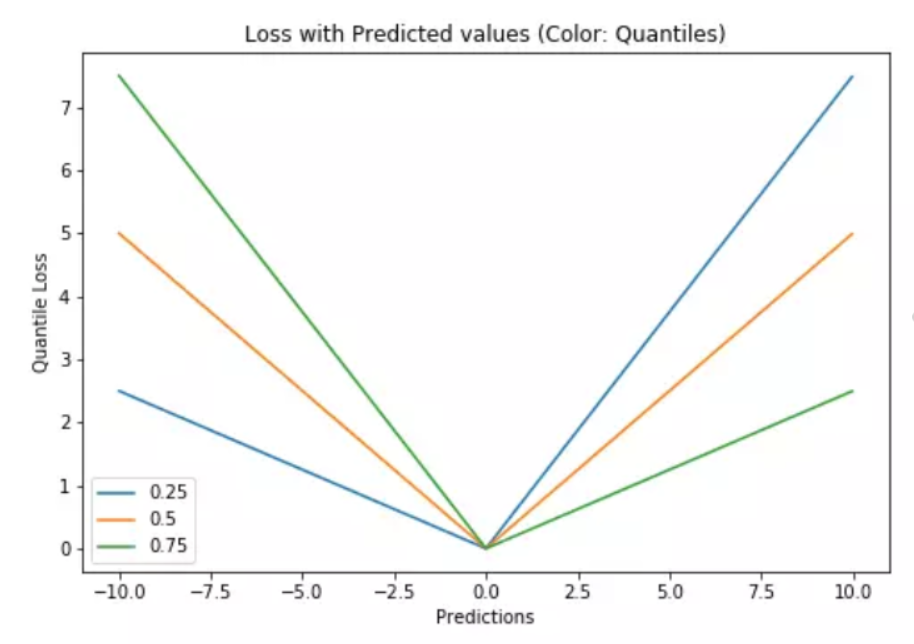

* 分位数回归：虚线表示基于0.05和0.95分位数损失函数的回归，红线是MSE损失的回归

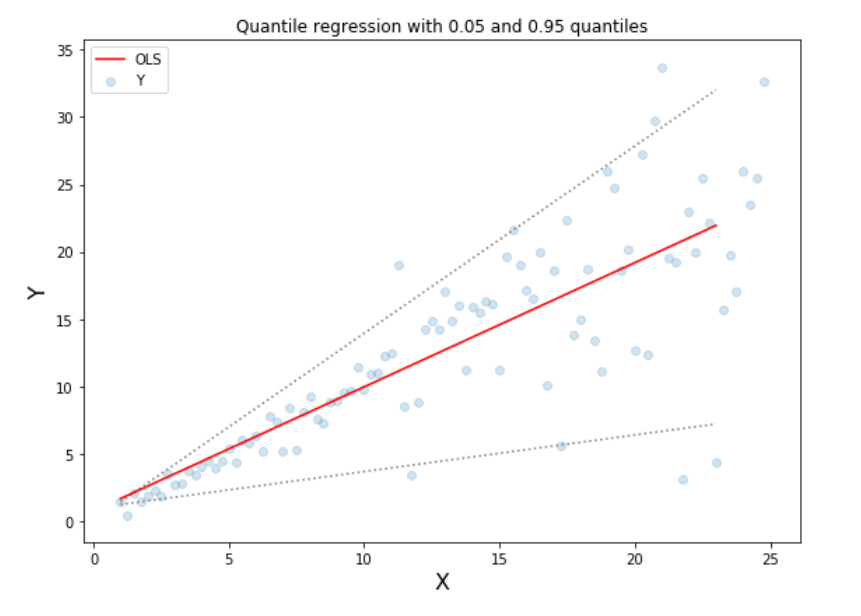

In [1]:
import tensorflow as tf

y_true = tf.constant([[1],[4],[2],[1]],tf.float32)
y_pred = tf.constant([[4],[2],[1],[3]],tf.float32)

#### quantile_loss :and gamma is {0.25, 0.5, 0.75}
gamma = tf.constant(0.25,tf.float32)
def quantile_loss(y_pred,y_true,gamma):
    judge_h = tf.cast(tf.greater_equal(y_true, y_pred),tf.float32)
    loss_h = tf.reduce_sum(judge_h*gamma*tf.abs(y_true-y_pred))
    
    judge_l = tf.cast(tf.less(y_true, y_pred),tf.float32)
    loss_l = tf.reduce_sum(judge_l*(1-gamma)*tf.abs(y_true-y_pred))
    
    loss = loss_h + loss_l
    return loss
quantile = quantile_loss(y_pred, y_true, gamma)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

quantile_loss = sess.run([quantile])

print("quantile loss：",quantile_loss)

quantile loss： [4.5]
